<div style="
    display: inline-block;
    border-radius: 25px;
    background: linear-gradient(135deg, #DDBAD9, #F9D69E);
    font-size: 2rem;
    padding: 20px 40px;
    color: white;
    font-weight: bold;
    text-align: center;
    border: 3px solid black;
    box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3);
">
    🎵 Spotify Streaming Data Analysis 📊🔥
</div>

This Jupyter notebook presents a detailed analysis of Spotify streaming data. Throughout this analysis, we will explore various aspects of users' listening behavior, including the most played artists and songs, listening patterns over time, and reasons why songs are skipped.

**Contents**

1. **Data Upload**: Import and initial display of the data.
2. **Data Cleansing**: Null value handling and data type conversion.
3. **Exploratory Data Analysis (EDA)**: Visualization and analysis of the data to extract relevant information.
4. **Listening Pattern Analysis**: Study of listening patterns over time and across different platforms.
5. **Skipped Song Analysis**: Exploration of the reasons and patterns behind songs being skipped.

Throughout this workbook, we will use various Python libraries such as pandas, numpy, matplotlib, seaborn and plotly to perform the analysis and create visualizations to help us better understand the data.

# <div style="display: inline-block; background: linear-gradient(135deg, #F6BFBF, #FBD4C0); color: black; font-size: 1rem; font-weight: bold; padding: 12px 20px; border-radius: 8px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.2);"><b>1 |</b> Data Loading</div>

In [89]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [90]:
""" file_path = '/kaggle/input/spotify-streaming-history/spotify_history.csv' """
file_path = './spotify_history.csv'
df = pd.read_csv(file_path)

In [91]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


# <div style="display: inline-block; background: linear-gradient(135deg, #F6BFBF, #FBD4C0); color: black; font-size: 1rem; font-weight: bold; padding: 12px 20px; border-radius: 8px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.2);"><b>2 |</b> Data Cleaning</div>

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [93]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [94]:
df[df.isnull().any(axis=1)]

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
577,0Cng3O0fIHllQx3S78RvmL,2015-08-12 02:26:11,iOS,283466,From Eden,Hozier,Hozier,NaN,trackdone,False,False
596,4VSg5K1hnbmIg4PwRdY6wV,2015-08-12 05:03:15,iOS,40681,Shades Of Cool,Lana Del Rey,Ultraviolence,trackdone,NaN,False,True
597,1NA2NvAgCB4EfcBC8OHfuj,2015-08-12 05:07:44,iOS,268173,Staying Up,The Neighbourhood,I Love You.,NaN,trackdone,False,False
605,2YuyaXVPEDnuO3cFuQ3BTW,2015-08-12 05:23:23,iOS,41145,El Karma,Noel Torres,La Balanza,trackdone,NaN,False,True
606,4YfMIrgiCbzo4td18hwwvA,2015-08-12 05:24:10,iOS,46997,Tentándome,Juan Magán,The King Is Back,NaN,endplay,False,True
...,...,...,...,...,...,...,...,...,...,...,...
10088,5cgL1YdlGWR5KfncpAGFQk,2017-01-06 19:14:00,iOS,253866,Custard Pie - 1990 Remaster,Led Zeppelin,Physical Graffiti,NaN,trackdone,False,False
11368,24NwBd5vZ2CK8VOQVnqdxr,2017-01-14 02:45:35,iOS,168344,Sweet Emotion,Aerosmith,Toys In The Attic,trackdone,NaN,True,True
11369,4wMR4fRKMTyUJG6VAsmccv,2017-01-14 02:45:58,iOS,0,Riot Van,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",NaN,fwdbtn,False,True
24557,4gDyoe1FImDlXVt58ssnMf,2017-08-21 16:53:00,iOS,85495,All I Can Think About Is You,Coldplay,All I Can Think About Is You,NaN,NaN,False,True


In [95]:
# Reason Start
reason_start = df['reason_start'].value_counts()
reasons_s = reason_start[reason_start > 1]
print(reasons_s)

reason_start
trackdone     76655
fwdbtn        53793
clickrow      11228
appload        3729
backbtn        2205
playbtn        1458
remote          477
trackerror      120
unknown          23
nextbtn          21
popup             5
endplay           2
Name: count, dtype: int64


In [96]:
# Fill missing values with 'Unknown'
df['reason_start'] = df['reason_start'].fillna('Unknown')

In [97]:
# Reason End
reason_end = df['reason_end'].value_counts()
reasons_e = reason_end[reason_end > 1]
print(reasons_e)

reason_end
trackdone                       77194
fwdbtn                          53470
endplay                         10119
logout                           4367
backbtn                          2182
unexpected-exit-while-paused     1725
unknown                           268
remote                            224
unexpected-exit                   118
clickrow                           34
nextbtn                            21
appload                             7
popup                               6
reload                              4
trackerror                          4
Name: count, dtype: int64


In [98]:
# Fill missing values with 'Unknown'
df['reason_end'] = df['reason_end'].fillna('Unknown')

In [99]:
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

In [100]:
# Convert 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])
df.dtypes

spotify_track_uri            object
ts                   datetime64[ns]
platform                     object
ms_played                     int64
track_name                   object
artist_name                  object
album_name                   object
reason_start                 object
reason_end                   object
shuffle                        bool
skipped                        bool
dtype: object

In [101]:
# Extract date and hour for analysis
df["date"] = df["ts"].dt.date
df["hour"] = df["ts"].dt.hour

# <div style="display: inline-block; background: linear-gradient(135deg, #F6BFBF, #FBD4C0); color: black; font-size: 1rem; font-weight: bold; padding: 12px 20px; border-radius: 8px; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.2);"><b>3 |</b> Exploratory Data Analysis</div>

In [102]:
# Most streamed artists
artist_counts = df['artist_name'].value_counts()
print(artist_counts.head(10))  

artist_name
The Beatles           13621
The Killers            6878
John Mayer             4855
Bob Dylan              3814
Paul McCartney         2697
Led Zeppelin           2482
Johnny Cash            2478
The Rolling Stones     2390
Radiohead              2305
The Black Keys         2231
Name: count, dtype: int64


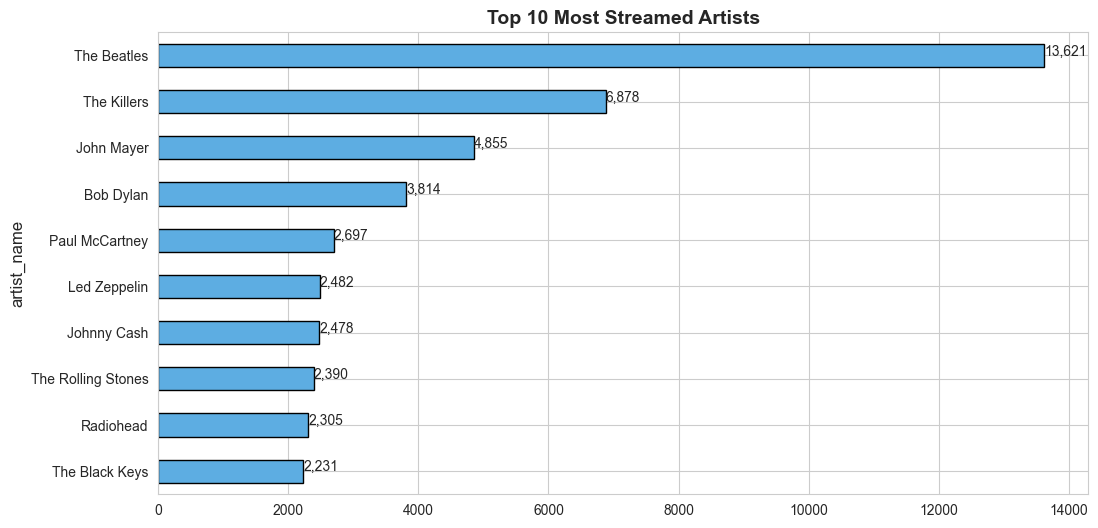

In [103]:
sns.set_style('whitegrid')

# Create figure and axis
plt.figure(figsize=(12, 6))
plt.title('Top 10 Most Streamed Artists', fontsize=14, fontweight='bold')
plt.xlabel('Number of Streams', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)

# Create horizontal bar plot
ax = artist_counts.head(10).sort_values(ascending=True).plot(
    kind='barh', color='#5DADE2', edgecolor='black'
)

# Add annotations
for bar in ax.patches:
    plt.text(bar.get_width() + 0.7, bar.get_y() + 0.25, f'{int(bar.get_width()):,}', fontsize=10)

plt.show()

In [104]:
# Total listening time per artist
artist_playtime = df.groupby("artist_name")["ms_played"].sum().sort_values(ascending=False).head(10)
artist_playtime 

artist_name
The Beatles           1210184552
The Killers           1059556516
John Mayer             725219443
Bob Dylan              569456396
Paul McCartney         357354370
Howard Shore           348930675
The Strokes            317508419
The Rolling Stones     307917009
Pink Floyd             260531842
Led Zeppelin           248338279
Name: ms_played, dtype: int64

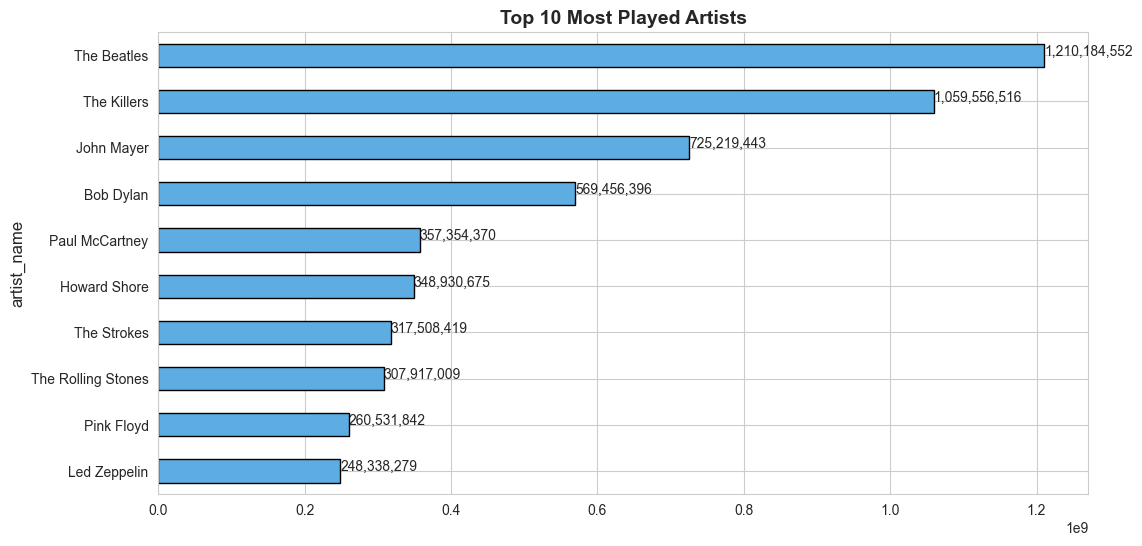

In [105]:
sns.set_style('whitegrid')

# Create figure and axis
plt.figure(figsize=(12, 6))
plt.title('Top 10 Most Played Artists', fontsize=14, fontweight='bold')
plt.xlabel('Time Played', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)

# Create horizontal bar plot
ax = artist_playtime.head(10).sort_values(ascending=True).plot(
    kind='barh', color='#5DADE2', edgecolor='black'
)

# Add annotations
for bar in ax.patches:
    plt.text(bar.get_width() + 0.7, bar.get_y() + 0.25, f'{int(bar.get_width()):,}', fontsize=10)

plt.show()

In [106]:
# Most played songs
most_played_songs = df.groupby(["track_name","artist_name"])["ms_played"].sum().sort_values(ascending=False).head(10)
most_played_songs

track_name                                                                           artist_name   
Ode To The Mets                                                                      The Strokes       67431580
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)   Howard Shore      64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)  Howard Shore      44756730
19 Dias y 500 Noches - En Directo                                                    Joaquín Sabina    42914042
In the Blood                                                                         John Mayer        38427087
Claudia's Theme - Version Eight                                                      Lennie Niehaus    37120900
Dying Breed                                                                          The Killers       36182653
The Breaking of the Fellowship (feat. "In Dreams")                                   Howard Shore      35990898
All 

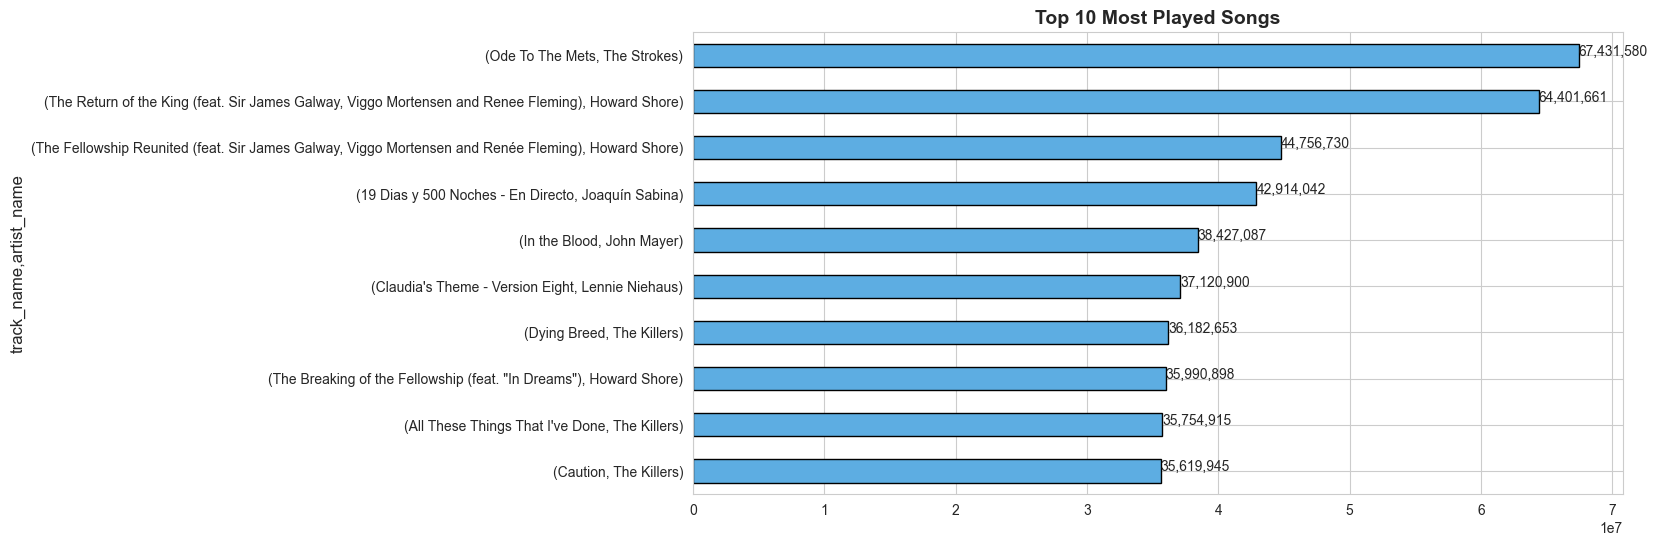

In [107]:
sns.set_style('whitegrid')

# Create figure and axis
plt.figure(figsize=(12, 6))
plt.title('Top 10 Most Played Songs', fontsize=14, fontweight='bold')
plt.xlabel('Time Played (ms)', fontsize=12)
plt.ylabel('Song Name', fontsize=12)

# Create horizontal bar plot
ax = most_played_songs.sort_values(ascending=True).plot(
    kind='barh', color='#5DADE2', edgecolor='black'
)

# Add annotations
for bar in ax.patches:
    plt.text(bar.get_width() + 0.7, bar.get_y() + 0.25, f'{int(bar.get_width()):,}', fontsize=10)

plt.show()

In [108]:
# Group by date and calculate total listening time
album_playtime = df.groupby(["album_name","artist_name"])["ms_played"].sum().sort_values(ascending=False).head(10)
print(album_playtime)

album_name                                          artist_name
The New Abnormal                                    The Strokes    186757895
The Beatles                                         The Beatles    186649296
Imploding The Mirage                                The Killers    159923361
Abbey Road                                          The Beatles    148620310
Blood On The Tracks                                 Bob Dylan      147889025
Past Masters                                        The Beatles    145024076
Hot Fuss                                            The Killers    144447524
The Wall                                            Pink Floyd     141105414
Where the Light Is: John Mayer Live In Los Angeles  John Mayer     113814001
Pressure Machine                                    The Killers    113324404
Name: ms_played, dtype: int64


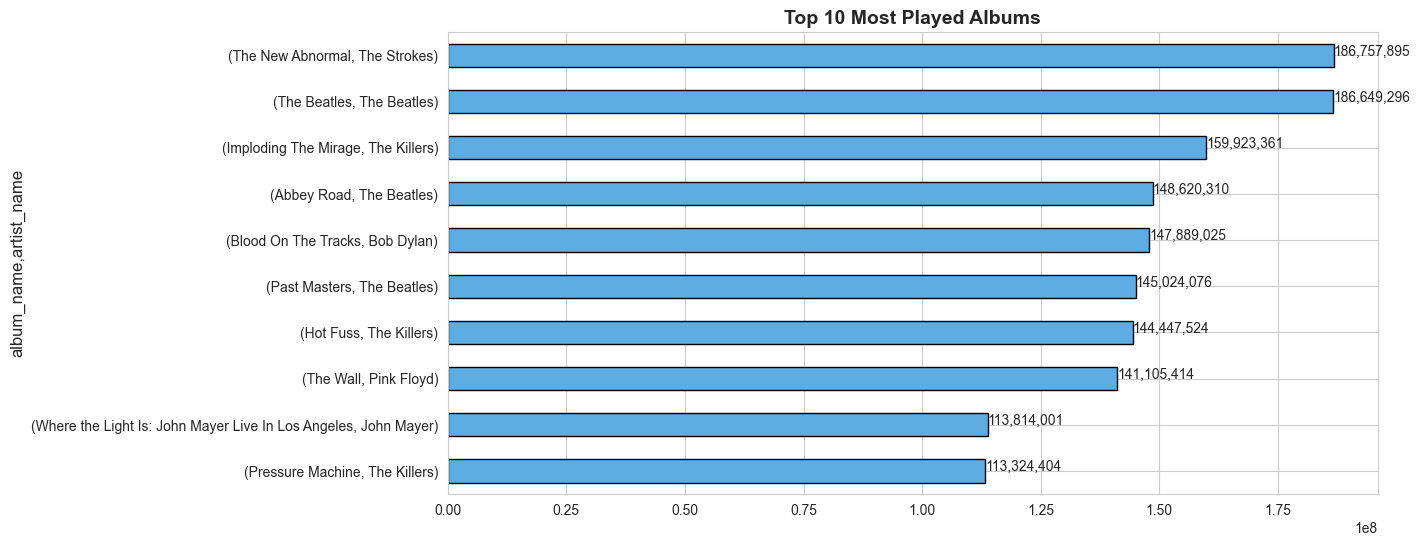

In [109]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
plt.title('Top 10 Most Played Albums', fontsize=14, fontweight='bold')
plt.xlabel('Listening Time (ms)', fontsize=12)
plt.ylabel('Album Name', fontsize=12)

ax = album_playtime.sort_values(ascending=True).plot(
    kind='barh', color='#5DADE2', edgecolor='black'
)

for bar in ax.patches:
    plt.text(bar.get_width() + 0.7, bar.get_y() + 0.25, f'{int(bar.get_width()):,}', fontsize=10)

plt.show()

In [110]:
# Mean listening time
mean_listening_time = df["ms_played"].mean()
mean_listening_time

128316.63509275323

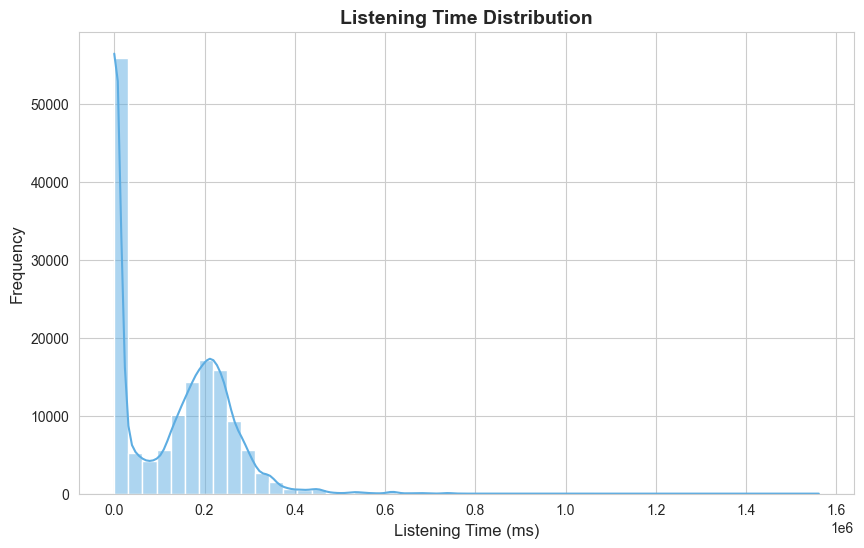

In [111]:
# Create a new column to indicate if the song was played completely or partially
df['played_completely'] = df['ms_played'] >= 180000  # Assuming 3 minutes (180000 ms) as a threshold for a complete play

# Plot the distribution of listening time
plt.figure(figsize=(10, 6))
plt.title('Listening Time Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Listening Time (ms)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram
sns.histplot(df['ms_played'], bins=50, kde=True, color='#5DADE2')

plt.show()

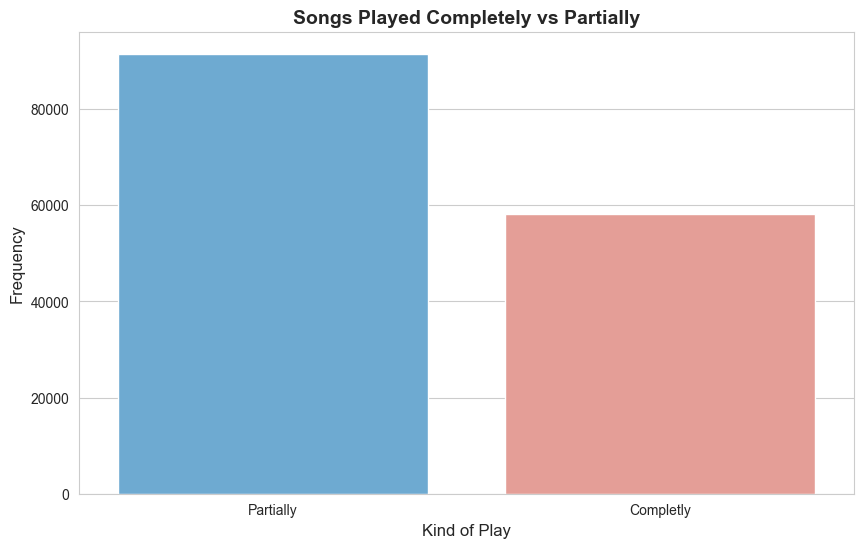

In [112]:
# Plot the count of completely played vs partially played songs
plt.figure(figsize=(10, 6))
plt.title('Songs Played Completely vs Partially', fontsize=14, fontweight='bold')
plt.xlabel('Kind of Play', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot bar plot
sns.countplot(x='played_completely', data=df, palette=['#5DADE2', '#F1948A'])
plt.xticks([0, 1], ['Partially', 'Completly'])

plt.show()

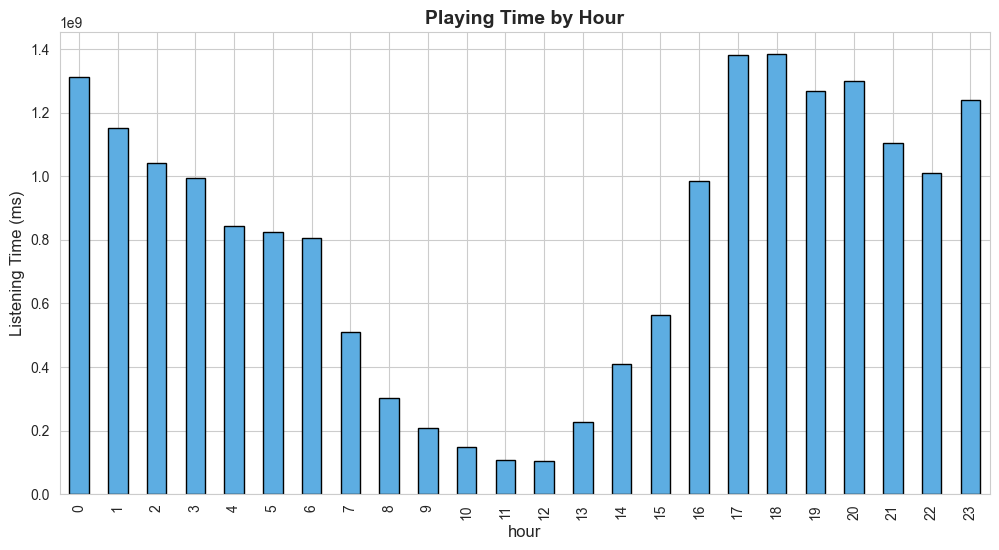

In [113]:
# Group by date and calculate total listening time
hourly_playtime = df.groupby('hour')['ms_played'].sum()

# Create figure and axis
plt.figure(figsize=(12, 6))
plt.title('Playing Time by Hour', fontsize=14, fontweight='bold')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Listening Time (ms)', fontsize=12)

# Create bar plot
ax = hourly_playtime.plot(kind='bar', color='#5DADE2', edgecolor='black')

plt.show()

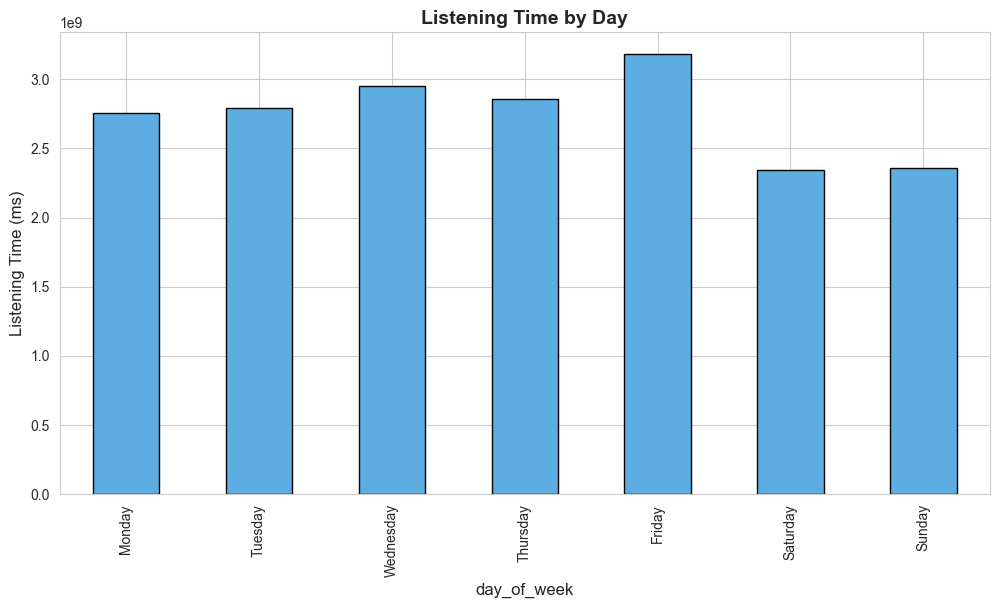

In [114]:
# Extract day of the week
df['day_of_week'] = df['ts'].dt.day_name()

# Group by day of the week
weekly_playtime = df.groupby('day_of_week')['ms_played'].sum()

# Order days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_playtime = weekly_playtime.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.title('Listening Time by Day', fontsize=14, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Listening Time (ms)', fontsize=12)
plt.xticks(rotation=45)

ax = weekly_playtime.plot(kind='bar', color='#5DADE2', edgecolor='black')

plt.show()

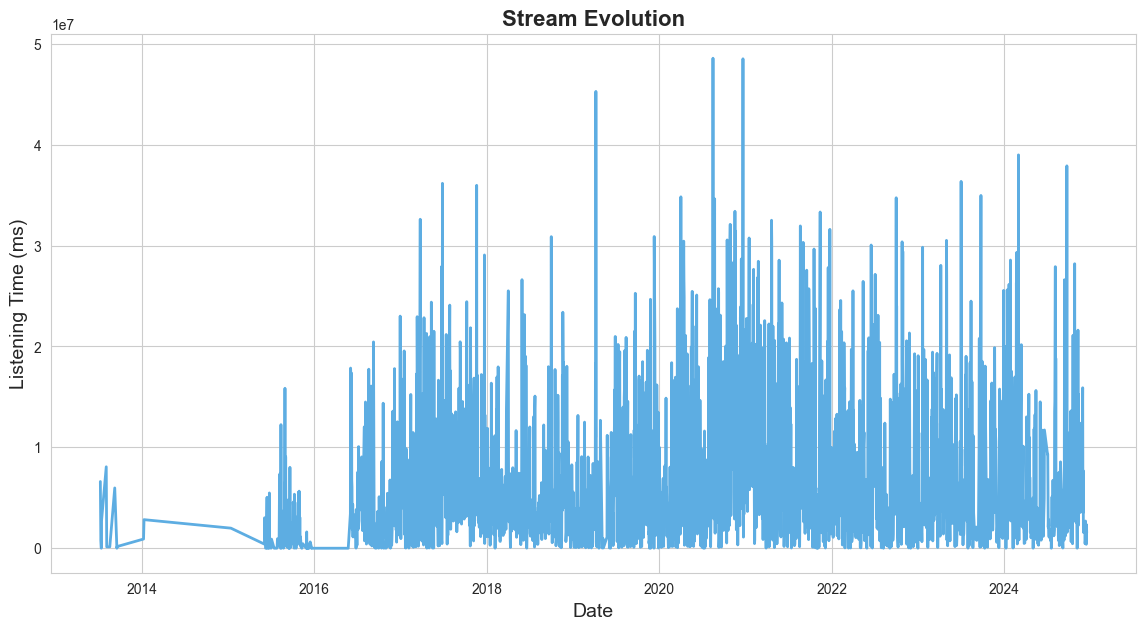

In [115]:
# Group by date and calculate total listening time
daily_playtime = df.groupby('date')['ms_played'].sum()

# Create figure and axis
plt.figure(figsize=(14, 7))
plt.title('Stream Evolution', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Listening Time (ms)', fontsize=14)

# Create line plot
plt.plot(daily_playtime.index, daily_playtime.values, color='#5DADE2', linewidth=2)

plt.show()

In [116]:
skipped_songs = df[df['skipped'] == True]
skipped_songs.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,date,hour,played_completely,day_of_week
96,2oq2dbjW3sxOY0BscMWd7Q,2013-07-10 08:28:05,windows,50952,I'll Be Alright,Passion Pit,Gossamer,unknown,unknown,False,True,2013-07-10,8,False,Wednesday
97,1WETgXqmJ2NaziQhtav0pK,2013-07-10 08:30:32,windows,147536,Moth's Wings,Passion Pit,Manners,unknown,unknown,False,True,2013-07-10,8,False,Wednesday
99,7qUA9MGpAGuIAAuXn0l7ik,2013-07-10 08:49:19,windows,4643,One Thing She'll Never Know,Josh Krajcik,Josh Krajcik - EP,trackdone,unknown,False,True,2013-07-10,8,False,Wednesday
100,6U93aW72iDtXBnzmb30r3i,2013-07-11 00:25:47,windows,96173,Gotta Be Tonight,Lifehouse,Almeria,unknown,popup,False,True,2013-07-11,0,False,Thursday
101,4rHZZAmHpZrA3iH5zx8frV,2013-07-11 05:12:52,windows,360354,Mirrors,Justin Timberlake,The 20/20 Experience (Deluxe Version),popup,endplay,False,True,2013-07-11,5,True,Thursday


In [117]:
# Most skipped songs
most_skipped_songs = skipped_songs.groupby(['track_name', 'artist_name']).size().sort_values(ascending=False).head(10)
print(most_skipped_songs)


track_name                                         artist_name         
Paraíso                                            Dvicio                  29
Superheroes                                        The Script              21
Photograph                                         Ed Sheeran              21
What Do You Mean?                                  Justin Bieber           20
Old Thing Back (feat. Ja Rule and Ralph Tresvant)  Matoma                  19
Drag Me Down                                       One Direction           18
Diez Mil Maneras                                   David Bisbal            18
Switzerland                                        The Last Bison          17
La Buena y la Mala                                 Banda Tierra Sagrada    15
All of Me                                          John Legend             14
dtype: int64


In [118]:
# Most skipped artists
most_skipped_artists = skipped_songs.groupby('artist_name').size().sort_values(ascending=False).head(10)
print(most_skipped_artists)

artist_name
The Beatles           388
The Killers           197
Bob Dylan             163
John Mayer            153
Led Zeppelin          128
The Rolling Stones    125
The Script            121
Imagine Dragons       116
Paul McCartney        107
Radiohead             102
dtype: int64


In [119]:
# Create a contingency table
contingency_table = pd.crosstab(df['shuffle'], df['skipped'])

# Calculate the proportion of skipped songs for each shuffle mode
proportion_skipped = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(proportion_skipped)

skipped     False     True 
shuffle                    
False    0.956763  0.043237
True     0.944311  0.055689


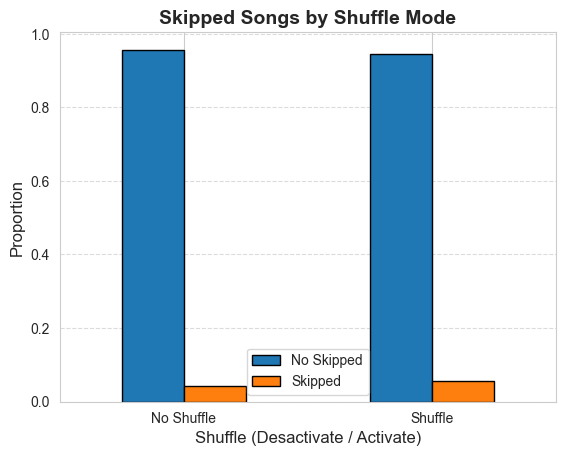

In [120]:
proportion_skipped.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Skipped Songs by Shuffle Mode', fontsize=14, fontweight='bold')
plt.xlabel('Shuffle (Desactivate / Activate)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Shuffle', 'Shuffle'], rotation=0)
plt.legend(['No Skipped', 'Skipped'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

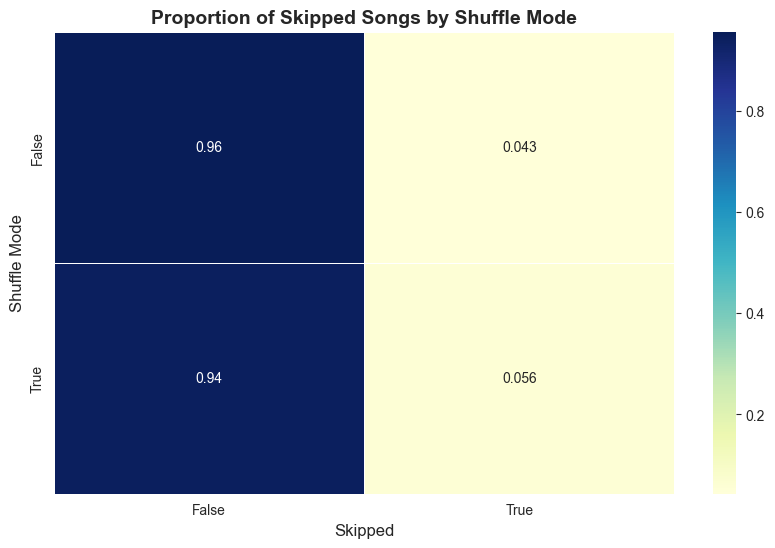

In [121]:
plt.figure(figsize=(10, 6))
plt.title('Proportion of Skipped Songs by Shuffle Mode', fontsize=14, fontweight='bold')
sns.heatmap(proportion_skipped, annot=True, cmap='YlGnBu', linewidths=.5)
plt.xlabel('Skipped', fontsize=12)
plt.ylabel('Shuffle Mode', fontsize=12)
plt.show()

In [122]:
contingency_table_reasons = pd.crosstab(df['reason_start'], df['reason_end'])
print(contingency_table_reasons)

reason_end    Unknown  appload  backbtn  clickrow  endplay  fwdbtn  logout  \
reason_start                                                                 
Unknown            48        0        0         0        3       8       0   
appload             0        5       41         0      768     598     164   
autoplay            0        0        0         1        0       0       0   
backbtn             1        0      451         1      129     728      75   
clickrow            4        0       20        19     5217     680     298   
endplay             0        0        0         0        0       0       0   
fwdbtn              8        1     1418         0     1028   42818     687   
nextbtn             0        0        1         4        0       0       0   
playbtn             0        0        1         0      538     338      29   
popup               0        0        0         0        2       0       0   
remote              0        0        0         0       95      

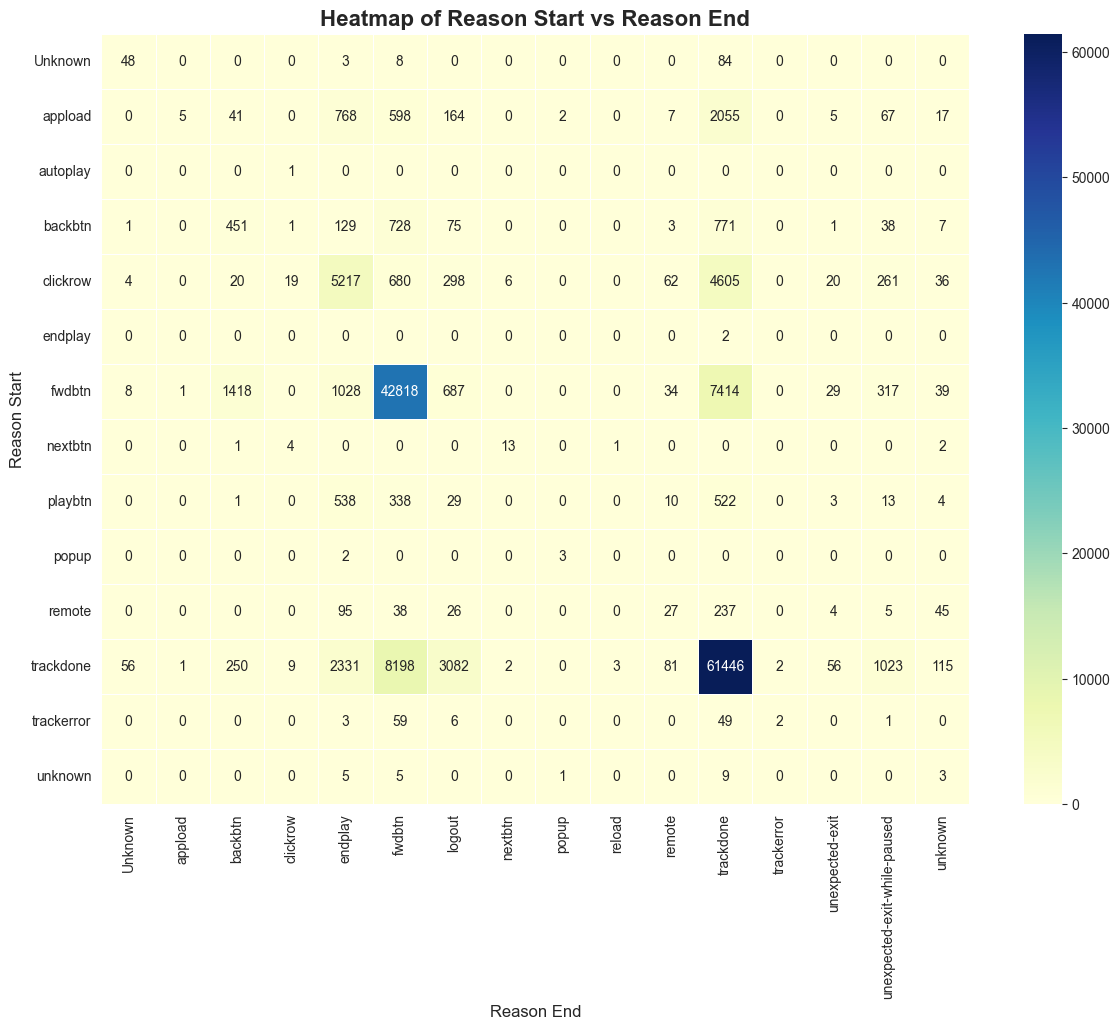

In [123]:
plt.figure(figsize=(14, 10))
plt.title('Heatmap of Reason Start vs Reason End', fontsize=16, fontweight='bold')
sns.heatmap(contingency_table_reasons, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.xlabel('Reason End', fontsize=12)
plt.ylabel('Reason Start', fontsize=12)
plt.show()

In [124]:
# Group by platform
platform_playtime = df.groupby('platform')['ms_played'].sum()
print(platform_playtime)

platform
android           17488795178
cast to device      726976200
iOS                 502951091
mac                 251908949
web player           25136126
windows             233763391
Name: ms_played, dtype: int64


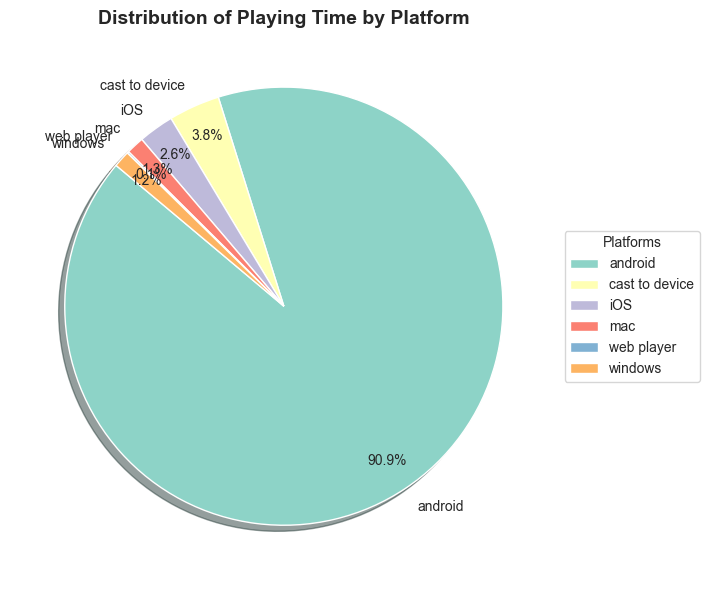

In [125]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Playing Time by Platform', fontsize=14, fontweight='bold')

platform_playtime.plot(
    kind='pie',
    autopct='%1.1f%%', 
    startangle=140,  
    colors=plt.cm.Set3.colors, 
    pctdistance=0.85,  
    shadow=True  
)

plt.legend(platform_playtime.index, title="Platforms", loc="center left", bbox_to_anchor=(1, 0.5))

plt.ylabel('') 
plt.tight_layout() 

plt.show()